# Retail Giant Global Mart Sales Forecasting 

## Overview

Global Mart is an online supergiant that caters to 7 Markets and 3 segments. 
- Markets are namely US, APAC, EU, Africa, APAC (Asia Pacific), Canada, EMEA(Middle East),EU (European Union),LATAM (Latin America), US (United States). 
- Segments are consumer, home office and corporate. 

The objective is to forecast the sales of the products for the next 6 months to have a proper estimate and to plan inventory and business processes accordingly.

However, due to certain unpredictable circumstances in the market, the company is prioritizing only the best and most consistent market segment in terms of profitability. The sales for the most consistently profitable market-segment is to be forecasted. Investing in this market segment will be beneficial for the company as the forecasts will be reliable. 

The most consistent market-segment is determined through a statistical term called coefficient of variance. It calculates the variations in data. It is mathematically given by 

$$CoV = \frac{Standard  Deviation}{Mean}$$



## Objective and Process 

#### 1. Finding the Most profitably consistent market-segment

Data is provided for sales in the period of 2011 to 2014 comprising of 48 months. It has 5 attributes: Order Date, Sales, Profit, Market and segment.  

There are 21 unique market segments upon combining 7 different markets representing the geographical sector and 3 different segments representing the customer category. Upon combining the market and segment columns, a dataset with order-date, sales and profit for each market-segment. The order date comprises of date,month and year of order. Only the month and year of order date was extracted resulting in 48 months of data

The dataset was the divided into train and test set comprising of 42 months and 6 months respectively. 

CoV for all the 21 market segments in train set was calculated to find the most consistently profitable market-segment. CoV calcluates the variation in data. Data with low CoV is more consistent and has a narrower spread than the data with high CoV. By this principle, the most consistent market-segment is the dataset with the least CoV value. 

Upon finding the most consistent market segment, the sales of the most profitable market segment was forecasted for 6 months.   

#### 2. Forecasting Sales

The most consistently profitable market segment is APAC-Consumer with the lowest CoV of 0.52. 

Dataset with 21 market-segments is filtered for APAC-Consumer segment. As only sales is to be forecasted, only sales and order date is extracted from the dataset. Now the data contains 48 months of sales data for the APAC-Consumer segment. 

Train and test set was divided with 42 months in train set and 6 months in test set respectively. 

The sales of the 6 months is forecasted for this market-segment using smoothing and Auto Regression techniques. Sales of the most profitable month is plotted to check for trend, seasons and residuals. Same is done using decomposition process. Seasonality is observed upon decomposition along with an upward trend. 

**Smoothing techniques used are** :
1. Naive method
2. Simple average method
3. Simple moving average method
4. Simple exponential method
5. Holt's exponential method
6. Holt Winter's additive exponential method 
7. Holt Winter's multiplicative exponential method

**Auto Regression Techniques used are:**
1. Simple auto regressive method (AR)
2. Moving average method (MA)
3. Auto regressive and Moving average method (ARMA)
4. Auto regressive integrated moving average method (ARIMA)
5. Seasonal auto regressive integrated and moving average method (SARIMA)

Train,test and forecasted values from each technique was plotted and MAPE values were calculated to find the most suitable forecasting technique for this dataset. 


## Index

1. Importing the Libraries.
2. Reading the dataset
    - Inspecting the dataframe.
3. Univariate analysis
4. Bivariate analysis
5. Data Preparation
    - Train-Test set split
    - Calculate CoV
    - Filtering the dataframe for the most consistently profitable market-segment
    - Plotting profit of the Market to check for consistency
6. Plotting the sales for 48 Months
7. Decomposition of data to check for trend, seasonality and residuals. 
    - Additive decomposition
    - Multiplicative decomposition
8. Forecasting the sales. 
    1. Smoothing Techniques
        - Naive technique
        - Simple Average technique
        - Simple Moving average forecast(12 Months)
        - Simple Moving average forecast(6 Months)
        - Simple Moving average forecast(3 Months)
        - Simple Exponential smoothing forecast
        - Holt's exponential smmothing technique
        - Holt winters exponential smoothing technique(additive)
        - Holt Winters exponential smoothing technique(multiplicative)
    2. Auto-Regressive techniques
        - Auto-Regressive techniques 
        - Moving average technique
        - ARMA(Auto regressive and moving average)
        - ARIMA(Auto regressive integrated Moving average technique)
        - SARIMA(Seasonal autoregressive integrated and moving average technique)
        
        

<a id=’importing_the_libraries’></a>

### Importing the libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id=’Reading_the_dataset’></a>
### Reading the dataset

In [196]:
store = pd.read_csv('Superstore.csv')
store.head()

,Order Date,Segment,Market,Sales,Profit
0,31/07/2012,Consumer,US,2309.650,762.1845
1,05/02/2013,Corporate,APAC,3709.395,-288.7650
2,17/10/2013,Consumer,APAC,5175.171,919.9710
3,28/01/2013,Home Office,EU,2892.510,-96.5400
4,05/11/2013,Consumer,Africa,2832.960,311.5200


The dataset has five attributes : Order date, Segment, market, sales and profit. Market and segment are combiend together to form a column called Market-segment. 

There are 21 unique market segments. A column Date is created by extracting month and year from Order date. 

In [197]:
store['Market-Seg'] = store['Segment']+' - '+store['Market']
#store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Date'] = pd.to_datetime(store['Order Date']).dt.to_period('m')
store.head()

,Order Date,Segment,Market,Sales,Profit,Market-Seg,Date
0,31/07/2012,Consumer,US,2309.650,762.1845,Consumer - US,2012-07
1,05/02/2013,Corporate,APAC,3709.395,-288.7650,Corporate - APAC,2013-05
2,17/10/2013,Consumer,APAC,5175.171,919.9710,Consumer - APAC,2013-10
3,28/01/2013,Home Office,EU,2892.510,-96.5400,Home Office - EU,2013-01
4,05/11/2013,Consumer,Africa,2832.960,311.5200,Consumer - Africa,2013-05


In [198]:
pd.DataFrame(store['Market-Seg'].value_counts(normalize = True)*100)

,Market-Seg
Consumer - APAC,11.111328
Consumer - LATAM,10.374342
Consumer - US,10.120881
Consumer - EU,10.111133
Corporate - APAC,6.400858
Corporate - EU,5.999220
Corporate - LATAM,5.952427
Corporate - US,5.888087
Consumer - EMEA,4.948333
Consumer - Africa,4.642230


#### Inspecting the dataframe 

In [199]:
store.shape

(51290, 7)

There are 51290 entries and 7 columns now. 

In [200]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  object   
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
 5   Market-Seg  51290 non-null  object   
 6   Date        51290 non-null  period[M]
dtypes: float64(2), object(4), period[M](1)
memory usage: 2.7+ MB


There are no null values in any columns. 

In [201]:
store.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


- Mean sales is 246.49 and mean profit is 28.61. 
- Maximum sales is 22638.48 and maximum profit is 8399.97
- Minimum in sales is 0.44 and that in profit is -6599.97


Dataframe is then sorted based on date. 

In [202]:
store.sort_values(by='Date', inplace = True)
print('Order date starts from', store['Date'].min(),'and ends at',store['Date'].max())

Order date starts from 2011-01 and ends at 2014-12


In [203]:
store.head()

,Order Date,Segment,Market,Sales,Profit,Market-Seg,Date
15262,01/02/2011,Corporate,EU,139.65,15.30,Corporate - EU,2011-01
26744,26/01/2011,Consumer,EU,88.44,15.84,Consumer - EU,2011-01
48614,24/01/2011,Corporate,EU,11.43,4.11,Corporate - EU,2011-01
9417,01/12/2011,Consumer,LATAM,491.00,122.70,Consumer - LATAM,2011-01
48590,01/10/2011,Home Office,US,4.71,0.00,Home Office - US,2011-01


### Univariate analysis

Text(0.5, 1.0, 'Boxplot of Sales in Global Mart from 2011-14')

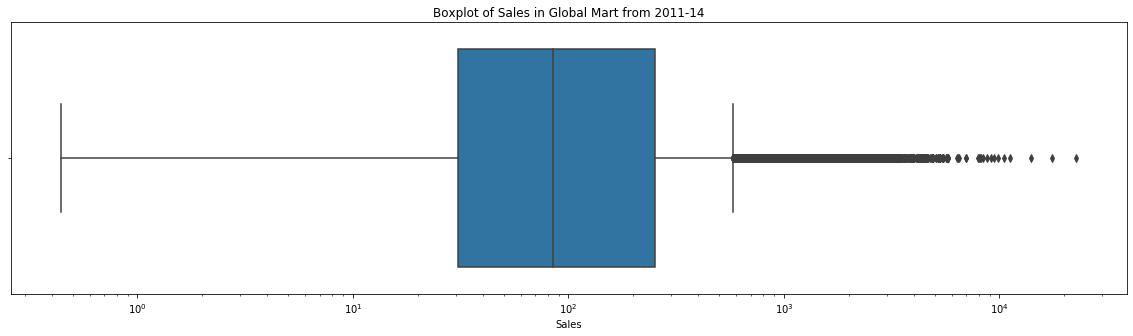

In [204]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'Sales', data = store)
plt.xscale('log')
plt.title('Boxplot of Sales in Global Mart from 2011-14')

There seem to be a lot of points above the 75th percentile of Sales. 

Text(0.5, 1.0, 'Boxplot of Profit in Global Mart from 2011-14')

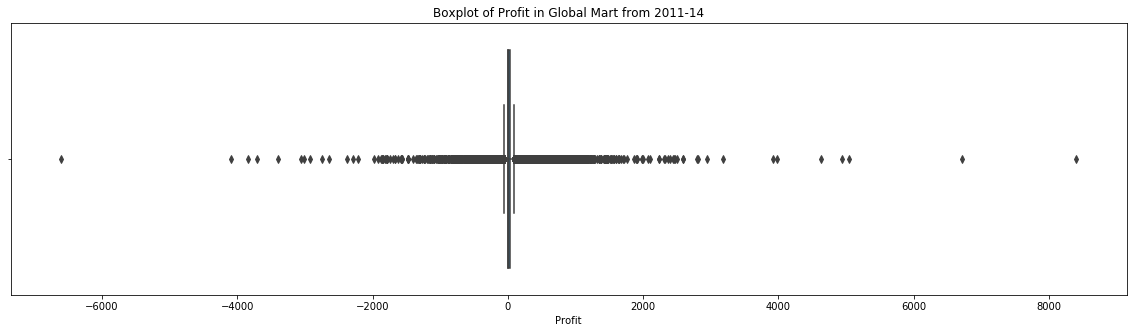

In [205]:
plt.figure(figsize = (20,5))
plot = sns.boxplot(x = 'Profit', data = store)
plt.title('Boxplot of Profit in Global Mart from 2011-14')

The profit values have a wide spread ranging from -6500 to 8500. 

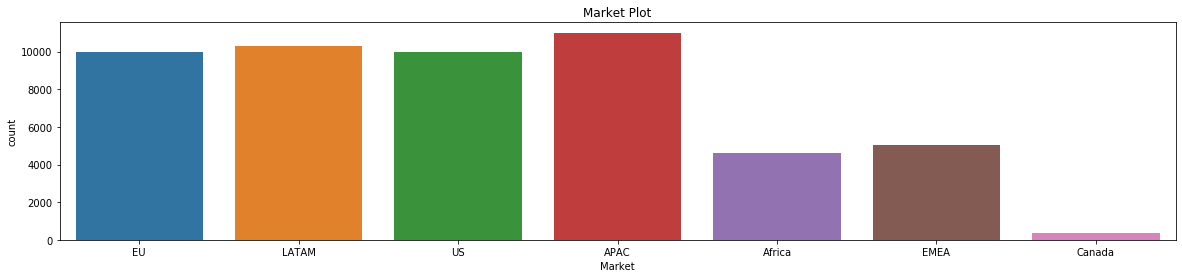

In [206]:
plt.figure(figsize = (20,4))
plt.title('Market Plot')
sns.countplot(x = 'Market', data = store)

Asia pacific seems to have the highest count in entries. 

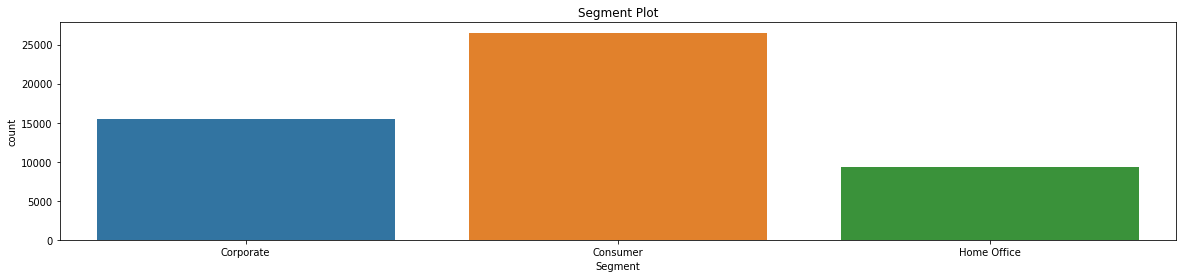

In [207]:
plt.figure(figsize = (20,4))
plt.title('Segment Plot')
sns.countplot(x = 'Segment', data = store)

Consumer seems to have the highest number of entries. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

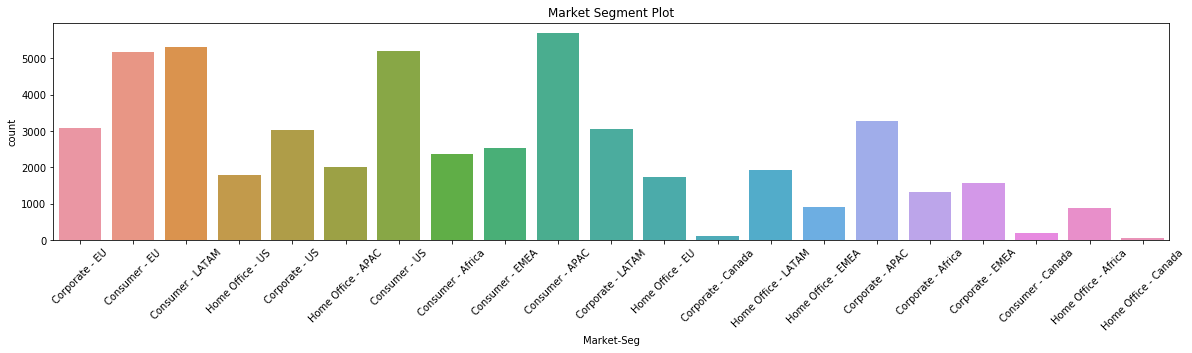

In [208]:
plt.figure(figsize = (20,4))
plt.title('Market Segment Plot')
sns.countplot(x = 'Market-Seg', data = store)
plt.xticks(rotation = 45)

Consumer-APAC has the highest number of entries. 

### Bivariate Analysis 

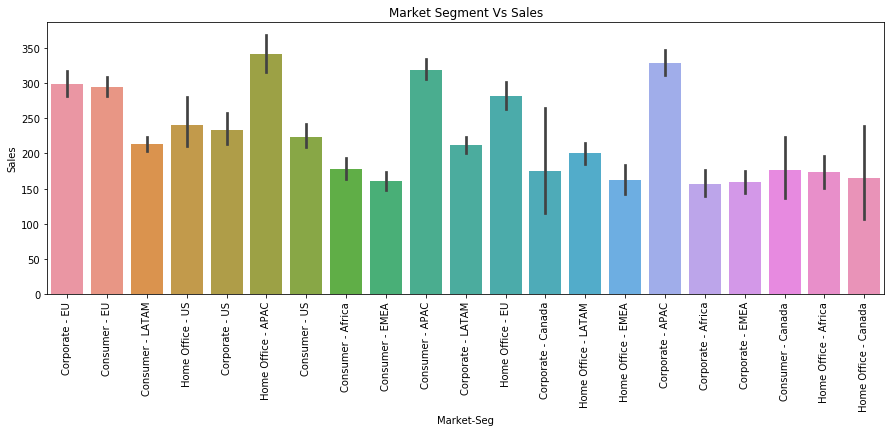

In [209]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title('Market Segment Vs Sales')
sns.barplot(data = store, x = 'Market-Seg', y = 'Sales')

Home Office-APAC has the highest sales followed by corporate-APAC followed by consumer-APAC. 

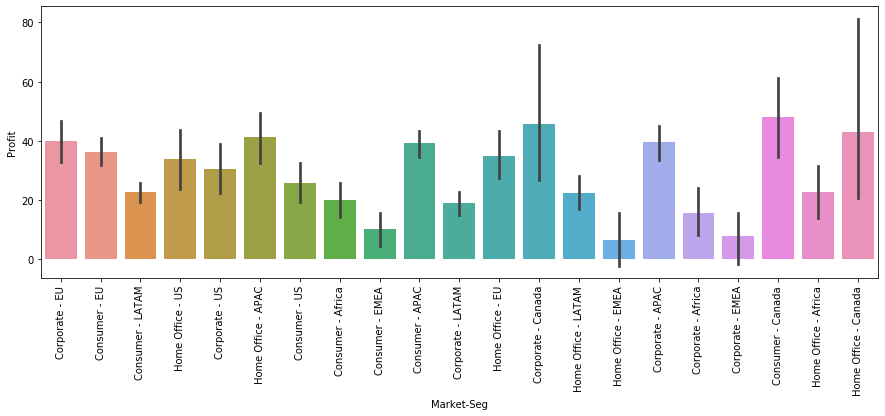

In [210]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.barplot(data = store, x = 'Market-Seg', y = 'Profit')

Consumer- Canada has the highest profits followed by Corporate Canada

### Data Preparation 

#### 1. Dividing into Train and Test

In [211]:
store.head()

,Order Date,Segment,Market,Sales,Profit,Market-Seg,Date
15262,01/02/2011,Corporate,EU,139.65,15.30,Corporate - EU,2011-01
26744,26/01/2011,Consumer,EU,88.44,15.84,Consumer - EU,2011-01
48614,24/01/2011,Corporate,EU,11.43,4.11,Corporate - EU,2011-01
9417,01/12/2011,Consumer,LATAM,491.00,122.70,Consumer - LATAM,2011-01
48590,01/10/2011,Home Office,US,4.71,0.00,Home Office - US,2011-01


In [212]:
storeg = store.pivot_table(index='Date', values='Profit', columns='Market-Seg', aggfunc='sum')

Dataframe is aggregated for sum for profit values for each market segment. 

In [213]:
train_len = 42
train = storeg[0:train_len]
test = storeg[train_len:]

Train length is kept as 42 months and test set length is 6 months. 

#### 2. Calculating CoV

In [214]:
mean = np.mean(train)
std = np.std(train)
CoV = std/mean
CoV = pd.DataFrame(CoV)
CoV = CoV.reset_index()
CoV.columns = ['Market segment','Most Consistent']
CoV.sort_values(by = 'Most Consistent', ascending = True, inplace = True)
CoV

,Market segment,Most Consistent
0,Consumer - APAC,0.522725
7,Corporate - APAC,0.530051
4,Consumer - EU,0.595215
5,Consumer - LATAM,0.683770
11,Corporate - EU,0.722076
12,Corporate - LATAM,0.882177
18,Home Office - EU,0.938072
14,Home Office - APAC,1.008219
6,Consumer - US,1.010530
13,Corporate - US,1.071829


The most consistent market is **Consumer-APAC**.

#### 3. Filtering the data for the Most consistent market segment. 

In [215]:
df = store[store['Market-Seg'] == 'Consumer - APAC']
df = df.drop('Order Date', axis = 1)
df.head()

,Segment,Market,Sales,Profit,Market-Seg,Date
1080,Consumer,APAC,1429.050,371.490,Consumer - APAC,2011-01
9203,Consumer,APAC,219.780,59.340,Consumer - APAC,2011-01
19331,Consumer,APAC,342.510,54.600,Consumer - APAC,2011-01
26270,Consumer,APAC,102.762,1.842,Consumer - APAC,2011-01
14830,Consumer,APAC,420.420,147.000,Consumer - APAC,2011-01


##### Inspecting the filtered out dataframe

In [216]:
df.shape

(5699, 6)

There are 5699 entries of Consumer-APAC. 

In [217]:
df.describe()

,Sales,Profit
count,5699.000000,5699.000000
mean,318.784646,39.097659
std,540.272454,164.472190
min,2.880000,-2380.350000
25%,46.542600,-2.877600
50%,121.920000,10.800000
75%,341.898300,46.800000
max,5759.964000,2817.990000


Sales in the new dataframe ranges from 2.88 to 5759 and profit ranges from -2380 to 2817 as opposed to -6000 to 8000 in the original dataframe. 

#### 4. Plotting the profit to check for consistency

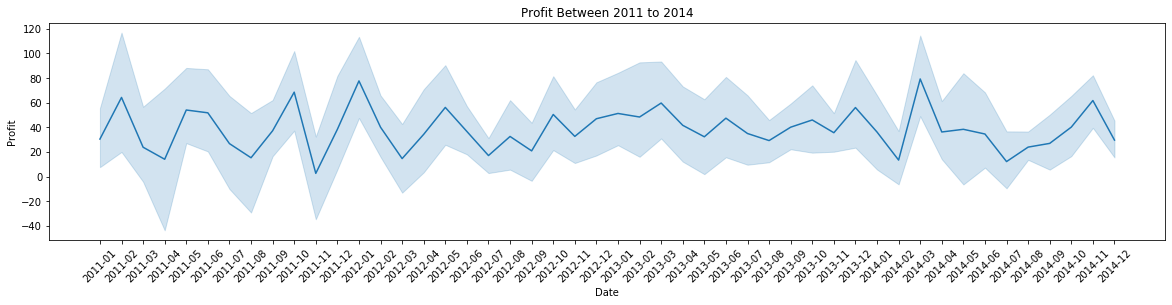

In [218]:
df['Date'] = df['Date'].astype(str)
plt.figure(figsize = (20,4))
sns.lineplot(x = 'Date',y = 'Profit', data = df)
plt.title('Profit Between 2011 to 2014')
plt.xticks(rotation = 45)
plt.show()

Profit is fairly consistent as seen in the plot. It has no high peaks or very low troughs. 

In [219]:
df = df.groupby('Date')['Sales'].sum()

### new dataframe df sales in a particular date are summed together to find the total sum of sales on that day.

df = pd.DataFrame(df) ## converting the series into a dataframe
df = df.reset_index()

df['Date'] = pd.to_datetime(df['Date'] ) ## converting the date into datetime format
df = df.set_index('Date')
df = df.sort_values(by = 'Date', ascending = True) ## sorting the values by date for data so that test set lies after train set

In [220]:
df.shape

(48, 1)

There are 48 rows for 48 months in the period between 2011 to 2014. 

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


### Plotting the sales for 48 Months 

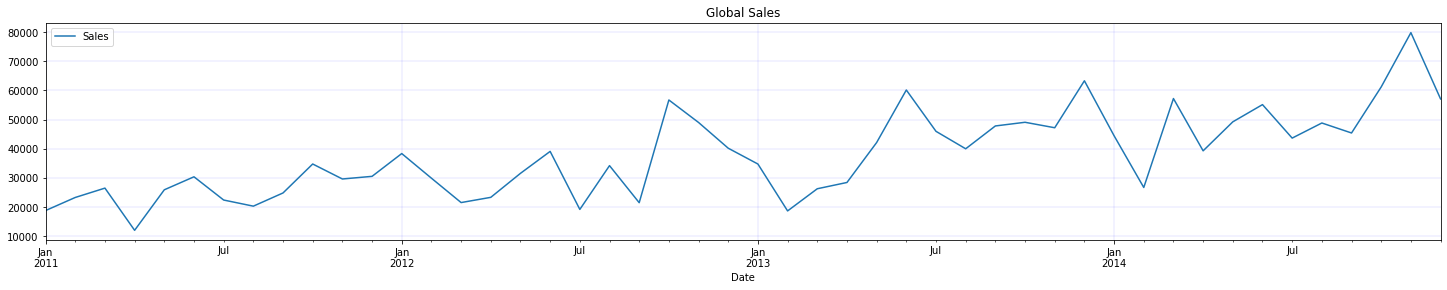

In [222]:
df.plot(figsize=(25, 4))
plt.legend(loc='best')
plt.grid(color='b', linestyle='-', linewidth=0.1)
plt.title('Global Sales')
plt.show(block=False)

Observations from the plot: 
    
1. There are no missing values. 
2. There is a upward trend in the plot. 
3. There are drop in sales around July every year. 
4. There is a spike in sales in June every year. 
5. There is one major spike in between July and December every year. 

### Decomposition of plot to check for Trend, Seasonality and Residuals 

#### 1. Additive decomposition 

This decomposition is used when the magnitude of the seasonal pattern in the data does not directly correlate with the value of the series. 

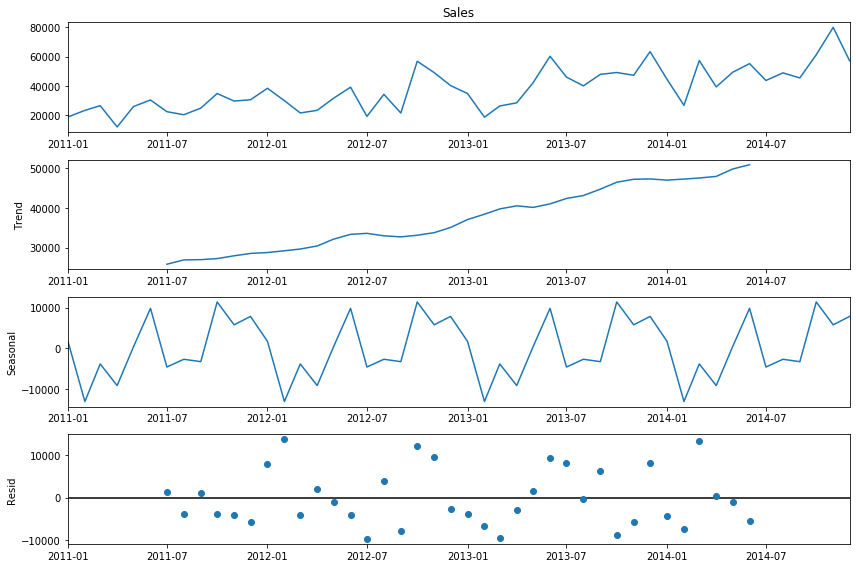

In [223]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

Upon decomposition, we observe that the dataset has an upward trend, it has seasonality and also has some residual elements in addition to trend and seasonality. The residuals have no pattern here. 

#### 2. Multiplicative Decomposition

This decomposition is used when the magnitude of the seasonal pattern in the data increases with an increase in data values and decreases with a decrease in the data values

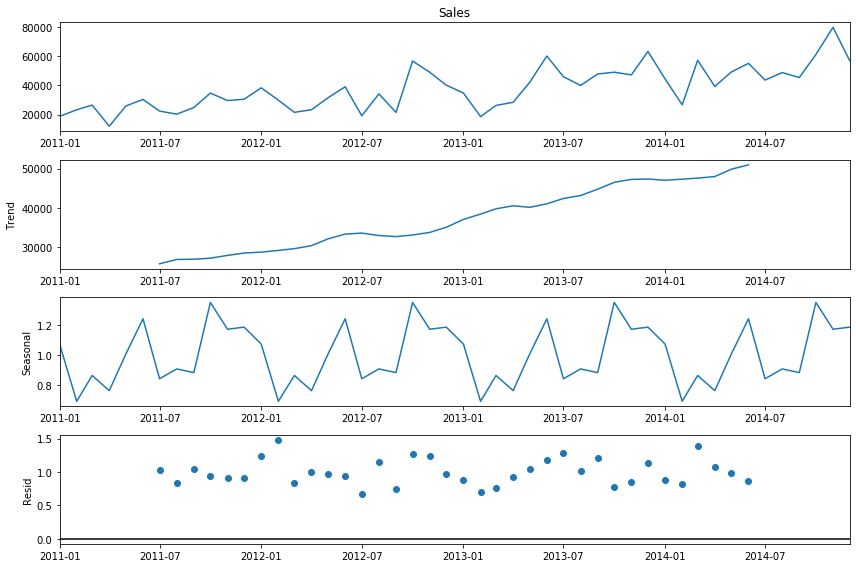

In [224]:
decomposition = sm.tsa.seasonal_decompose(df.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

Same observations as that of additive decomposition.

## Forecasting the Sales 

Again we divide the new dataframe df into train and test comprising of 42 and 6 months respectively. 

In [225]:
train_length = 42
trainset = df[0:train_length] # 42 months 
testset = df[train_length:] # 6 months

### 1. Smoothing Techniques 

#### 1.1 Naive forecast

In [226]:
y_hat_naive = testset.copy()
y_hat_naive['Naive forecast'] = trainset['Sales'][train_length-1] # last value is taken as the forecast. 

**Plotting the train, test and forecast**

In [227]:
def forecastplot(x, y):
    plt.figure(figsize = (20,4))
    plt.plot(trainset['Sales'], label = 'Train')
    plt.plot(testset['Sales'], label = 'Test')
    plt.plot(x, label = y )
    plt.title(y)
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()

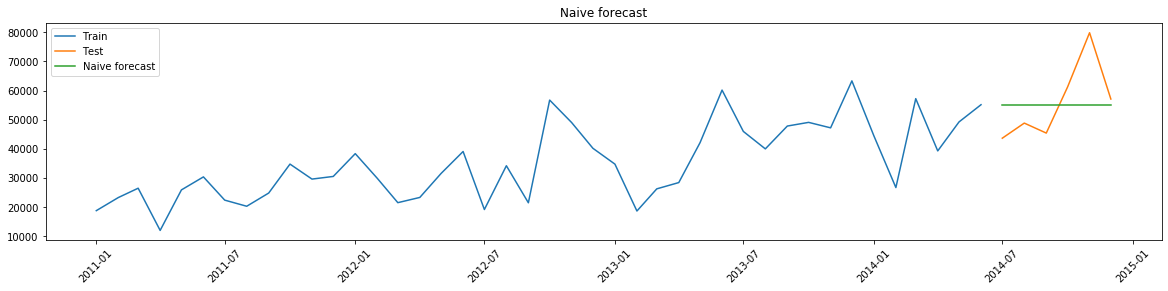

In [228]:
forecastplot(y_hat_naive['Naive forecast'], 'Naive forecast')

The Naive method takes the last value as the forecasted value. As seen from plot, it doesn't forecast the values accurately. 

**Calculating MAPE and RSME**

In [229]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_naive['Naive forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_naive['Naive forecast'])/testset['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


Lower the value of MAPE and RSME, better is the model. 

#### 1.2 Simple Average Forecast

In [230]:
y_hat_avg = testset.copy()
y_hat_avg['Average forecast'] = trainset['Sales'].mean()

**Plotting Train, Test and Forecast values**

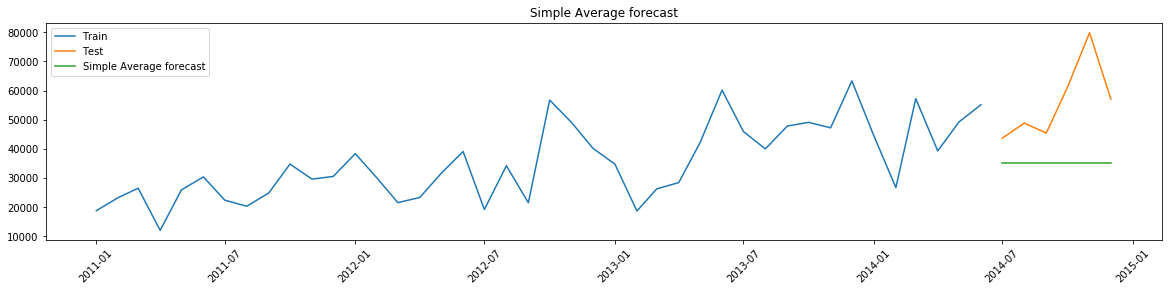

In [231]:
forecastplot(y_hat_avg['Average forecast'], 'Simple Average forecast')

The Simple average method takes an average of the entire dataset and forecasts the average value as the future values. It doesn't forecast the future values accurately as seen from plot.

**Calculating MAPE and RMSE**

In [232]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_avg['Average forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_avg['Average forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34


We observe that the MAPE value of Simple average method is higher(almost twice) that of Naive method indicating that it performs badly in comparison to Naive method. 

#### 1.3 Simple Moving Average Forecast (12 Months)

In [233]:
y_hat_sma = df.copy()
ma_window12 = 12 ## 12 months 
y_hat_sma['sma_forecast12'] = df['Sales'].rolling(ma_window12).mean()
y_hat_sma['sma_forecast12'][train_length:] = y_hat_sma['sma_forecast12'][train_length-1]

**Plotting Train, Test and Forecast values**

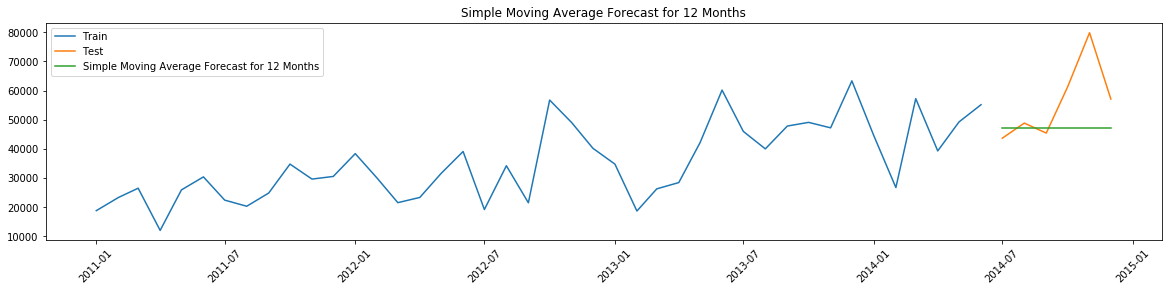

In [234]:
forecastplot(y_hat_sma['sma_forecast12'][train_length:], 'Simple Moving Average Forecast for 12 Months')

The simple moving average window takes average of the moving window and forecasts the value. Here the moving window is taken as 12 months. This technique predicts the level slightly better than simple average method and naive method. 

**Calculate MAPE and RMSE** 

In [235]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sma['sma_forecast12'][train_length:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sma['sma_forecast12'][train_length:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Forecast (12 Months)'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10


MAPE value of simple moving average model for a window of 12 months is lower than Naive and Simple average method. It is a better model than Naive and Simple Average. 

#### 1.4 Simple Moving average (6 Months) 

In [236]:
y_hat_sma = df.copy()
ma_window6 = 6
y_hat_sma['sma_forecast6'] = df['Sales'].rolling(ma_window6).mean()
y_hat_sma['sma_forecast6'][train_length:] = y_hat_sma['sma_forecast6'][train_length-1]

**Plotting Train, Test and Forecast values**

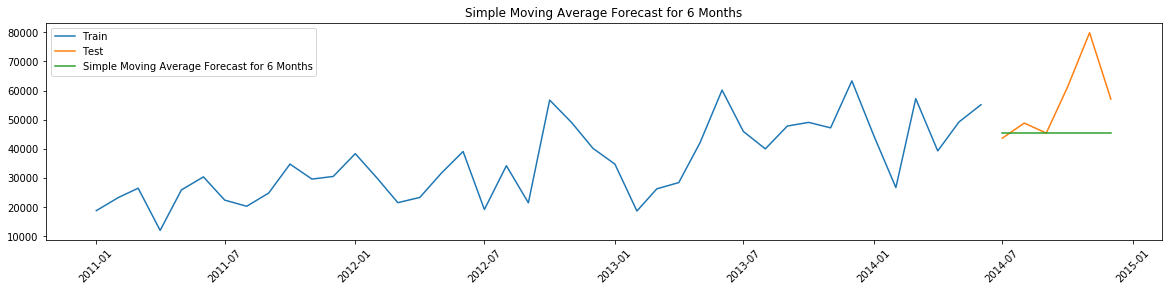

In [237]:
forecastplot(y_hat_sma['sma_forecast6'][train_length:], 'Simple Moving Average Forecast for 6 Months')

The window of moving window is reduced to 6 months to see the effect of shorter window. The level predicted is poor than the 12 month moving window. 

**MAPE and RMSE**

In [238]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sma['sma_forecast6'][train_length:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sma['sma_forecast6'][train_length:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Forecast (6 Months)'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80


MAPE value of Simple moving average for window of 6 months is still low but it is slightly higher than the simple moving average model for 12 months window. 


#### 1.5 Simple Moving Average Forecast (3 months)

In [239]:
y_hat_sma = df.copy()
ma_window3 = 3
y_hat_sma['sma_forecast3'] = df['Sales'].rolling(ma_window3).mean()
y_hat_sma['sma_forecast3'][train_length:] = y_hat_sma['sma_forecast3'][train_length-1]

**Plotting Train, Test and Forecast values.**

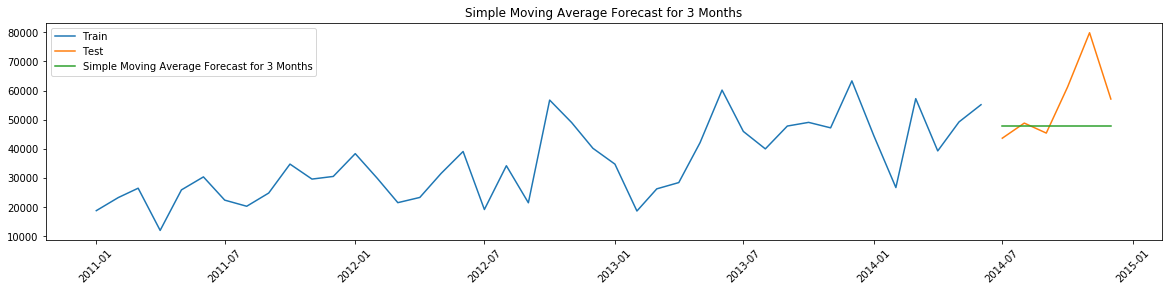

In [240]:
forecastplot(y_hat_sma['sma_forecast3'][train_length:], 'Simple Moving Average Forecast for 3 Months')

The moving window is further reduced to 3 months to check for effects of shorter window. This performs better than moving window of 12 and 6 months in forecasting the future values. 

**MAPE and RMSE**

In [241]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sma['sma_forecast3'][train_length:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sma['sma_forecast3'][train_length:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Forecast (3 Months)'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82


MAPE of simple moving average method with a window of 3 months is the lowest among all the models built till now indicating that it is the best forecast model so far.  

#### 1.6 Simple Exponential smoothing 

In [242]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(trainset['Sales'])
model_fit = model.fit(optimized=True) ## the most optimal alpha parameter will be chosen 
print(model_fit.params)
y_hat_ses = testset.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 0.22775352568914944, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 22929.88084125547, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


The most optimal Alpha is chosen as 0.22. 

**Plotting Train, Test and Forecast values.**

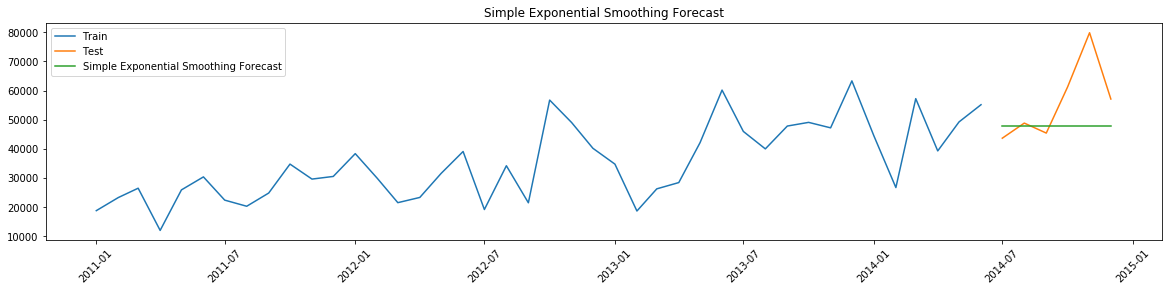

In [243]:
forecastplot(y_hat_ses['ses_forecast'], 'Simple Exponential Smoothing Forecast')

The simple exponential method gives higher weight to the recent observation. It's plot is better than Naive method and simple average method but almost the same as Simple moving average of 3 months forecast results. 

**RMSE and MAPE**

In [244]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ses['ses_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83


MAPE of Simple Exponential method is low but is slightly higher than that of Simple Moving Average with a rolling window of 3 months. 

#### 1.6 Holt's Exponential Smoothing Forecast

Uptil now, only level was forecasted. Through Holt's exponential method, trend can also be forecasted. 

In [245]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods = 12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True) # most optimum alpha and beta values are taken
print(model_fit.params)
y_hat_holt = testset.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.008107388341458563, 'smoothing_slope': 0.008107388192826305, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 14647.552856581167, 'initial_slope': 893.9025526130991, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


- Alpha is 0.008 and beta is 0.008. 
- Initial level is taken as 14647 and initial slope is 893. 

**Plotting Train, test and forecast values**

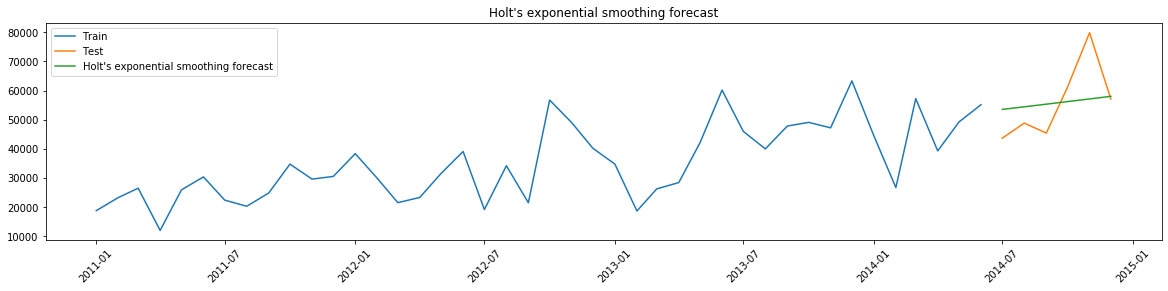

In [246]:
forecastplot(y_hat_holt['holt_forecast'], 'Holt\'s exponential smoothing forecast')

Holt's exponential method forecasts trend as well. As seen in plot, there is an upward trend to the forecast values now. 

**RMSE and MAPE Calculation**

In [247]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_holt['holt_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exp method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68


#### 1.7 Holt Winter's Exponential Smoothing (Additive) Technique

In [248]:
y_hat_hwa = testset.copy()
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 2.007775139726402e-07, 'smoothing_slope': 1.945480107733651e-07, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30309.403568044218, 'initial_slope': 697.7432575119122, 'initial_seasons': array([ -9373.83726438, -19619.66600073, -12098.78915038, -19915.42462018,
        -9228.07198384,   -972.58349021, -14258.89281421, -12871.58966028,
       -13431.51323281,   1064.51843225,  -4548.43064843,  -2616.30208416]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


- Alpha is 2.00, beta is 1.94 and gamma is 0. 
- We observe that the seasonality is not a function of the level component or the difference between subsequent troughs of the time series data does not increase as you progress in the graph, hence Holt-Winters’ additive method works best.

**Plotting Train, Test and Forecast values**

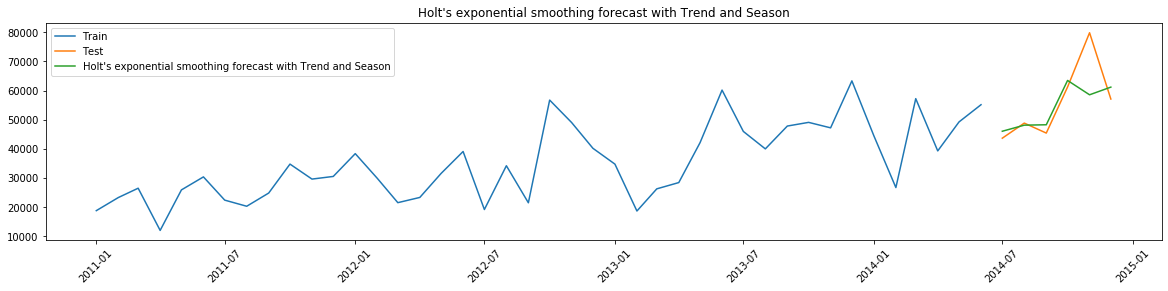

In [249]:
forecastplot(y_hat_hwa['hwa_forecast'], 'Holt\'s exponential smoothing forecast with Trend and Season')

Holt Winters method predicts the seasonality too. The plot has an upward trend and seasonality too. 

The forecast values are have the trend and seasonality seen in test set to some extend.  

**RMSE and MAPE Calculations**

In [250]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_hwa['hwa_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exponential Additive method '], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44


Holt exponential additive method has the lowest MAPE value among all techniques. 

#### 1.7 Holt's Exponential Smoothing (Multiplicative) Technique

If the seasonality is a function of the level component or the difference between subsequent troughs of the time series data increases as the graph progresses, then the Holt-Winters’ multiplicative method works best. However, in the case of Global Mart sales that is not the case. Nevertheless, we can check for MAPE values to conclude which is the best technique. 

In [251]:
y_hat_hwm = testset.copy()
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 6.935038542078674e-08, 'smoothing_slope': 6.506928182793317e-08, 'smoothing_seasonal': 2.0968103715492784e-07, 'damping_slope': nan, 'initial_level': 34110.96532611635, 'initial_slope': 730.4171663523829, 'initial_seasons': array([0.71586182, 0.48621241, 0.68201597, 0.53149833, 0.73797602,
       0.90144863, 0.62469261, 0.65703313, 0.64895749, 0.93177792,
       0.82775121, 0.88438061]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


We observe that all alpha, beta and gamma values are low(e-08) 

**Plotting Train, Test and Forecast values.**

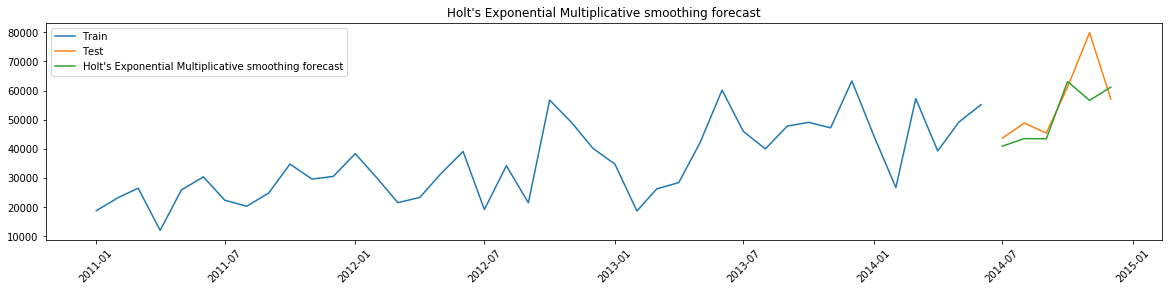

In [252]:
forecastplot(y_hat_hwm['hwm_forecast'], 'Holt\'s Exponential Multiplicative smoothing forecast')

Holt Winters Multiplicative method is used when seasonality increases with level. As this is not the case with the Global Mart sales forecast, this model's plot shows that it performs poorly as compared to the Holt Winter's additive method

**RMSE and MAPE Calculations** 

In [253]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_hwm['hwm_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exponential method Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44
0,Holt Exponential method Multiplicative,9976.49,10.12


in this case, the seasonality is not a function of the level component or the difference between subsequent troughs of the time series data does not increase as you progress in the graph, so the Holt-Winters’ additive method works best as is reflected from MAPE values. 

MAPE of Holt winter's additive method is lower than that of Holt winter multiplicative method indicating that it is a better model. 

**Plot of all the Smoothing Techniques**

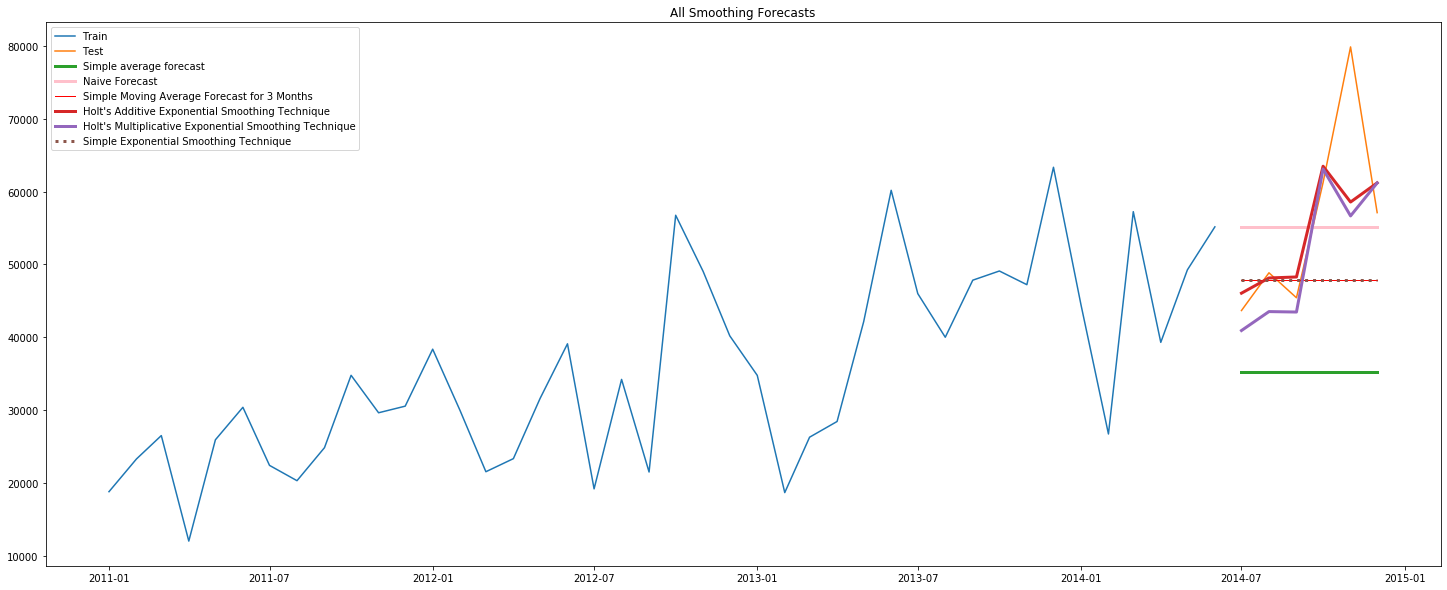

In [254]:
plt.figure(figsize=(25,10))
plt.plot(trainset['Sales'], label='Train')
plt.plot(testset['Sales'], label='Test')
plt.plot(y_hat_avg['Average forecast'], label='Simple average forecast',linewidth = 3)
plt.plot(y_hat_naive['Naive forecast'], label = 'Naive Forecast',linewidth = 3, color = 'pink')
plt.plot(y_hat_sma['sma_forecast3'][train_length:], label = 'Simple Moving Average Forecast for 3 Months',linewidth = 1, color = 'red')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Holt\'s Additive Exponential Smoothing Technique',linewidth = 3)
plt.plot(y_hat_hwm['hwm_forecast'], label = 'Holt\'s Multiplicative Exponential Smoothing Technique',linewidth = 3)
plt.plot(y_hat_ses['ses_forecast'], label = 'Simple Exponential Smoothing Technique',linewidth = 3,linestyle = 'dotted')
plt.legend(loc='best')
plt.title('All Smoothing Forecasts')
plt.show()

- Simple moving average forecast for a moving window of 3 months superimposes with Simple exponential smoothing. As is evident from their MAPE values, their performance is similiar. 
- Both Holt winters method display seasonilty and perform better than the other smoothing techniques. But the Holt Winters additive forecast is better than multiplicative forecast. It forecasts the level, trend and seasonlity fairly well compared to others.   

### 2. Auto Regression

There are two assumptions to build a auto-regressive model. 
1. Stationarity : The statistical properties mean, variance and co-variance should be same throughout the series. 
2. Auto-Correlation : This helps us determine how a variable is influenced by its own lagged values. 

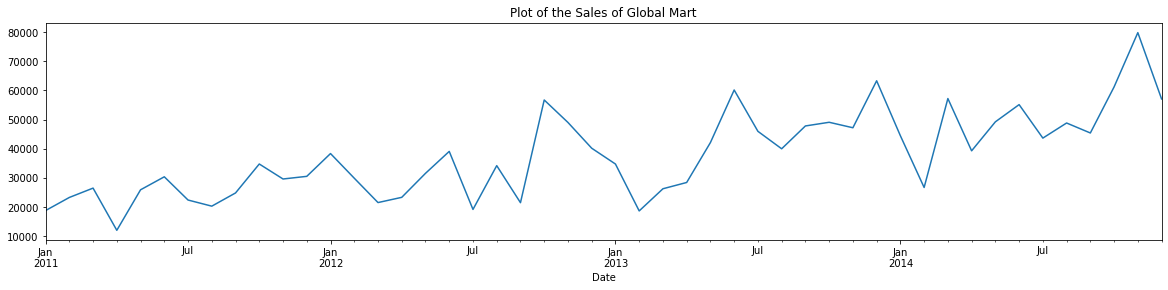

In [255]:
plt.figure(figsize = (20,4))
plt.title('Plot of the Sales of Global Mart')
df['Sales'].plot()

There is a trend to this plot indicating that this plot may not be stationary. However, we will use tests like ADF and KPSS to determine the stationarity of the series. 

**Augmented Dickey fuller test**

Null Hypothesis of ADF test is that the series is not stationary. Here, we have performed KPSS test to determine stationarity. 

**KPSS Test**

Null hypothesis of KPSS test is that series is stationary. If p-value is greater than 0.05, series is stationary. 

In [256]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Sales'])
print(kpss_test)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

(0.5770764651955994, 0.024720321345854595, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


p-value is less than 0.05 indicating that null hypothesis can be rejected. Series is not stationary. 

**Box Cox Transformation** 

To convert the series to non-stationary, boxcoz transformation is used. This process makes the variance constant. 

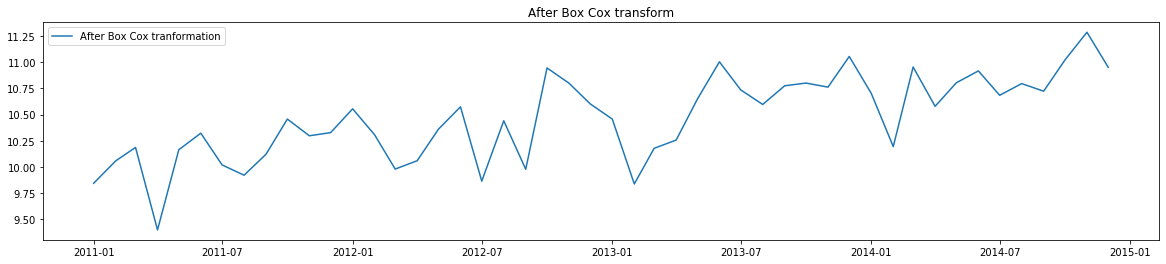

In [257]:
from scipy.stats import boxcox
df_boxcox = pd.Series(boxcox(df['Sales'], lmbda=0), index = df.index) ## creating a new series called df_boxcox

plt.figure(figsize=(20,4))
plt.plot(df_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

Further, we differeniate the series to remove any trend in it. 

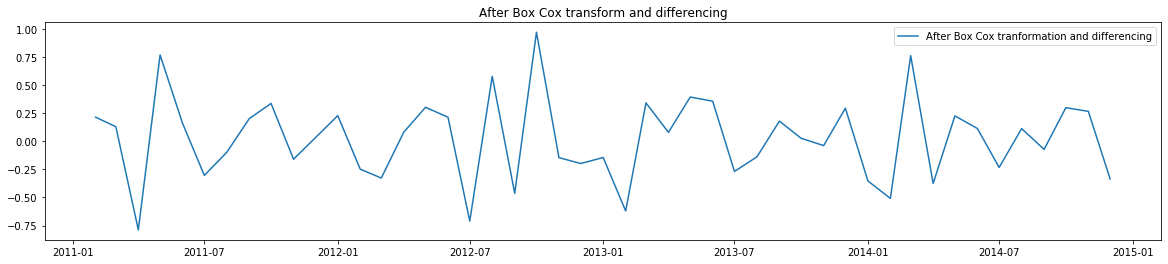

In [258]:
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), df.index)
## shift operator gives the consequetive difference i.e. difference between 2 consequetive terms
df_boxcox_diff.dropna(inplace = True) ## first difference would be between 2nd and 1st. the first term will be null. 

plt.figure(figsize=(20,4))
plt.plot(df_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

Now that the series is transformed and differentiated, stationary tests are done to check if the stationarity has been achieved or not. 

In [259]:
adf_test = adfuller(df_boxcox_diff) ## 

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


p-value is low. The null hypothesis here is that series is not stationary. As p-value is low, it can be rejected. 

After transforming and differencing, the data is further split into train and test. 

In [260]:
## splitting both data after bocox and data after boxcox and differencing
train_data_boxcox = df_boxcox[:train_length]
test_data_boxcox = df_boxcox[train_length:]

train_data_boxcox_diff = df_boxcox_diff[:train_length-1]
test_data_boxcox_diff = df_boxcox_diff[train_length-1:]

#### 2.1 Auto-regressive Method

In [261]:
from statsmodels.tsa.arima_model import ARIMA # I and M and A parameters are closed. 
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) ### Only the first parameter is given and it is lag here. 
# We are giving a lag of 1 here i.e. we have only one y(t-1)
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


p value is taken as 1. Model can be given as :

$$ y_{t} = 0.024 - 0.406y_{t-1} + error $$

**Recover the original series**

In [262]:
y_hat_ar = df_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max()) 
# entire data range
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum() 
## doing the opposite of differencing : cumulative sum
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox']) # converting log to anti log is to raise it to an exponential

**Plotting the train, test and forecast values.**

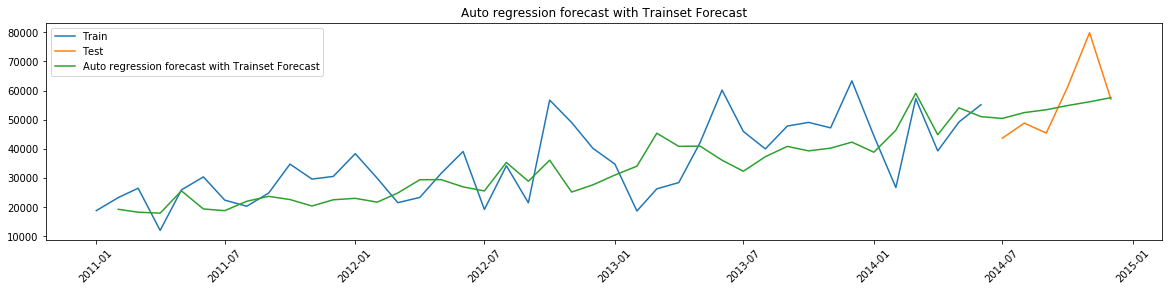

In [263]:
forecastplot(y_hat_ar['ar_forecast'],'Auto regression forecast with Trainset Forecast')

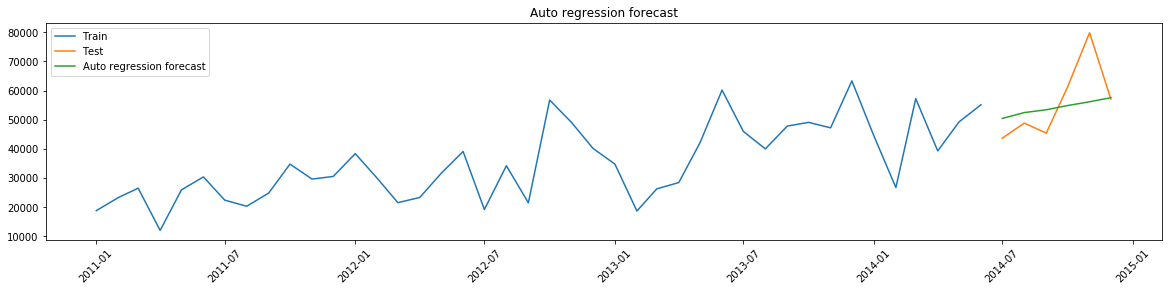

In [264]:
forecastplot(y_hat_ar['ar_forecast'][testset.index.min():],'Auto regression forecast')

AR(1) plot forecasts the trend better Simple exponential but it doesnt show seasonality. Its performance as seen from plot is better than Naive method, Simple average method, Simple exponential method, Holts exponential method. 

**MAPE and RMSE calculations**

In [265]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ar['ar_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ar['ar_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44
0,Holt Exponential method Multiplicative,9976.49,10.12
0,Autoregressive (AR) method,10985.28,13.56


MAPE of AR(1) method is higher than that of Holt's Exponential method indicating that Holt's additive is a better model than AR(1)

#### 2.2 Moving Average

In [266]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) ## q is 1
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


ma.L1 is the MA coefficient for lag 1

**Recover the original series**

In [267]:
y_hat_ma = df_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum() 
## taking the cumulative sum to reverse differencing 
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])
## reversing transformation
y_hat_ma.head()

Date
2011-02-01       0.214
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
dtype: object

**Plotting Train, Test and Forecast Values**

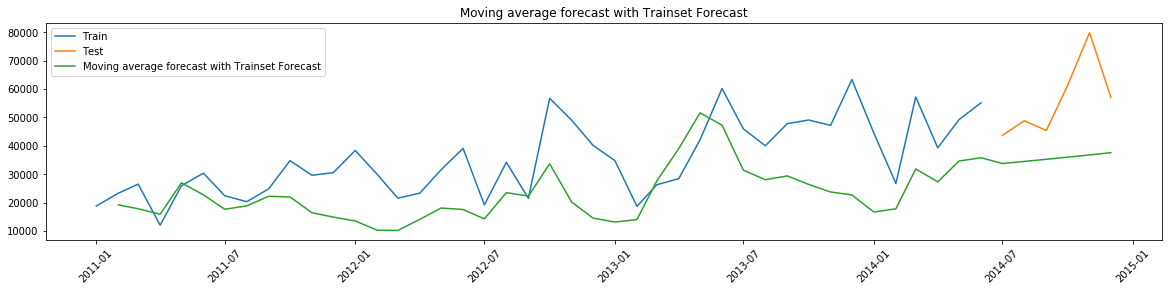

In [268]:
forecastplot(y_hat_ma['ma_forecast'], 'Moving average forecast with Trainset Forecast')

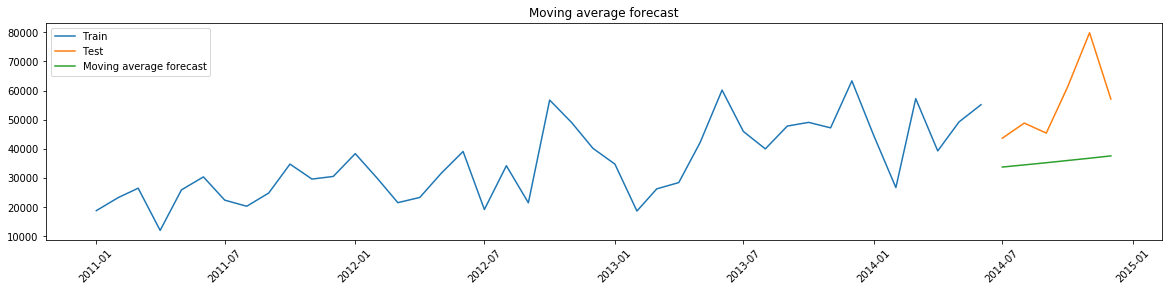

In [269]:
forecastplot(y_hat_ma['ma_forecast'][testset.index.min():], 'Moving average forecast')

As seen from the above two plots, MA(1) underforecasts as compared to AR(1)

In [270]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ma['ma_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ma['ma_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44
0,Holt Exponential method Multiplicative,9976.49,10.12
0,Autoregressive (AR) method,10985.28,13.56


Moving average with a lag of 1 has a higher MAPE value than AR(1) indicating that it is a poorer model compared to AR(1).

#### 2.3 ARMA(Auto-Regressive Moving Average method)

In [271]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
## p = 1 and q = 1
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


AR(1) has a coefficent of 0.07 and MA(1) has a coefficient of -1.00 and the constant is 0.02.

**Recover the original series** 

In [272]:
y_hat_arma = df_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
### predicting for the whole year -> data_boxcox_diff.index.min(), data_boxcox_diff.index.max()

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

**Plotting the Train, Test and Forecasted values**

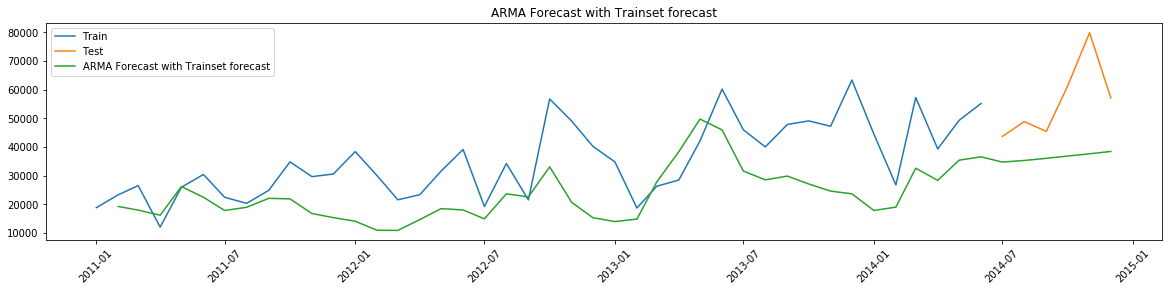

In [273]:
forecastplot(y_hat_arma['arma_forecast'], 'ARMA Forecast with Trainset forecast')

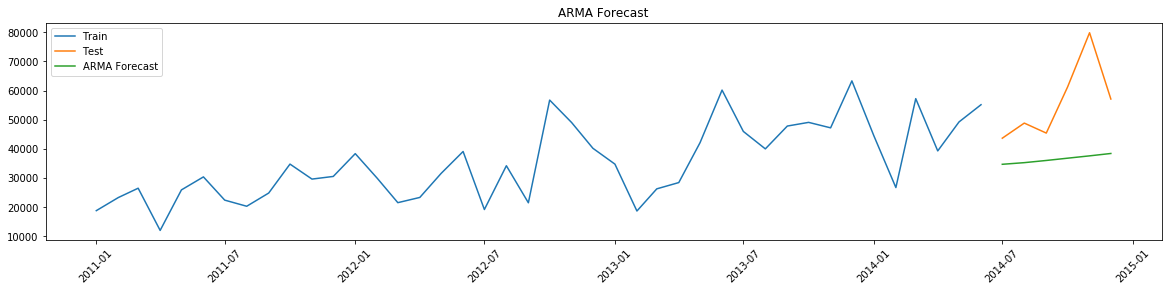

In [274]:
forecastplot(y_hat_arma['arma_forecast'][testset.index.min():], 'ARMA Forecast')

As observed from the plots, ARMA(1,1) also underforecasts. 

In [275]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_arma['arma_forecast'][train_length-1:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_arma['arma_forecast'][train_length-1:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44
0,Holt Exponential method Multiplicative,9976.49,10.12
0,Autoregressive (AR) method,10985.28,13.56


ARMA's performance is slightly better than MA(1) as the MAPE value is lower than that of MA(1). 

#### 2.4 ARIMA - Auto Regressive Integrated Moving Average

In [276]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
## we dont have to differentiate data, ARIMA does it on its own. So only boxcox transformed data is used here. 

model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


Auto regressive coefficient is 0.07 and moving average coefficient is -1. These values are very much similar to ARMA as the model is the same expect for the differencing part. 

In ARMA, data is differenced before model is built. In ARIMA, the model itself takes care of the differencing part. 

**Recover Original Series after Transformation**

In [277]:
y_hat_arima = df_boxcox_diff.copy()
## since d is 1, we will get a differenced series as an output. Hence we pick data_boxcox_diff 
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

**Plotting Train, Test and Forecast values**

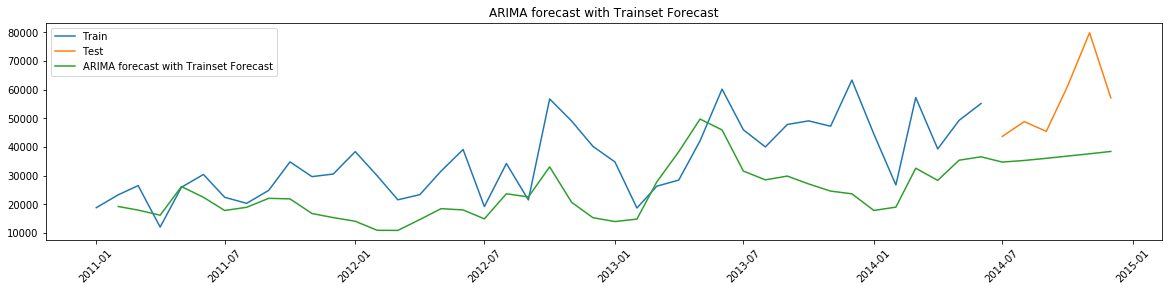

In [278]:
forecastplot(y_hat_arima['arima_forecast'], 'ARIMA forecast with Trainset Forecast')

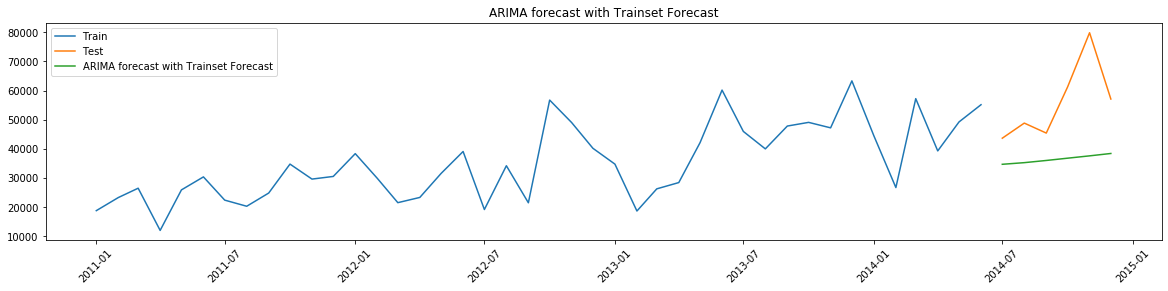

In [279]:
forecastplot(y_hat_arima['arima_forecast'][testset.index.min():], 'ARIMA forecast with Trainset Forecast')

Both ARMA and ARIMA plots are the same and they both underforecast. 

**MAPE and RMSE calculations**

In [280]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_arima['arima_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_arima['arima_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (12 Months),15192.01,16.10
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Moving Average Forecast (3 Months),14756.73,15.82
0,Simple Exponential method,14764.97,15.83
0,Holt Exp method,11315.31,15.68
0,Holt Exponential Additive method,9026.50,8.44
0,Holt Exponential method Multiplicative,9976.49,10.12
0,Autoregressive (AR) method,10985.28,13.56


As observed, the MAPE values of ARMA and ARIMA with the same p and q values is the same. 

#### 2.5 SARIMA (Seasonal Auto Regressive Integrated Moving Average Method)

In [281]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
## Non-seasonal elements p =1, q=1,d =1
## seasonal elements P = 1, Q= 1, D = 1, m= 12

## order is for non-seasonal parameters, seasonal orders are P,Q,D,m
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.040652
ma.L1      -0.996448
ar.S.L12    0.099860
ma.S.L12   -0.963552
sigma2      0.058739
dtype: float64


- Non seasonal AR coefficient is -0.04
- Non seasonal MA coefficient is -0.99
- seasonal AR coefficient is 0.099
- seasonal MA coefficient is -0.96
- sigma2 is the intercept = 0.058

**Recovering the original series** 

In [282]:
y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
## We dont have to the cumulative sum as we used to do in ARIMA. 
##  We dont have to do the integration part as it is directly done in SARIMA

y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

**Plotting Train, Test and Forecast values**

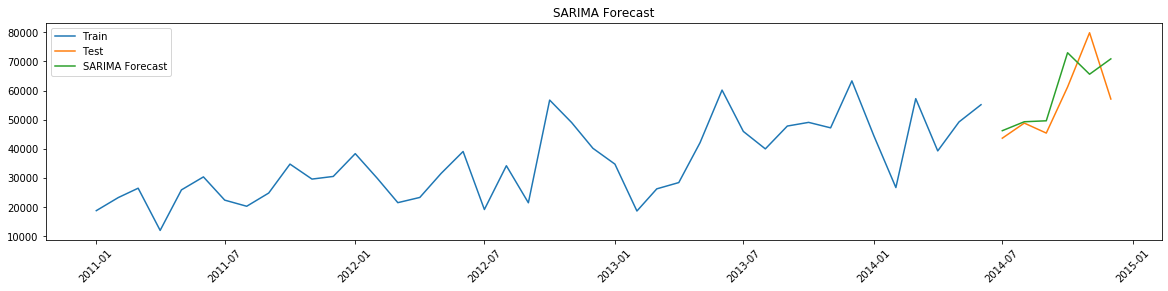

In [283]:
forecastplot(y_hat_sarima['sarima_forecast'][testset.index.min():], 'SARIMA Forecast')

SARIMA performance is better than ARIMA. It forecasts level, trend and seasonality. 

**MAPE and RMSE Calculations**

In [284]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sarima['sarima_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sarima['sarima_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results
results.set_index('Method')

,RMSE,MAPE
Method,,
Naive method,12355.97,17.47
Simple Average method,24146.06,34.34
Simple Moving Average Forecast (12 Months),15192.01,16.10
Simple Moving Average Forecast (6 Months),16294.34,16.80
Simple Moving Average Forecast (3 Months),14756.73,15.82
Simple Exponential method,14764.97,15.83
Holt Exp method,11315.31,15.68
Holt Exponential Additive method,9026.50,8.44
Holt Exponential method Multiplicative,9976.49,10.12


Upon introducing seasonality element, MAPE has reduced considerably. 

SARIMA is the best auto-regressive model with the lowest MAPE value of 12.88

**Plotting all Autoregressive forecasts together**

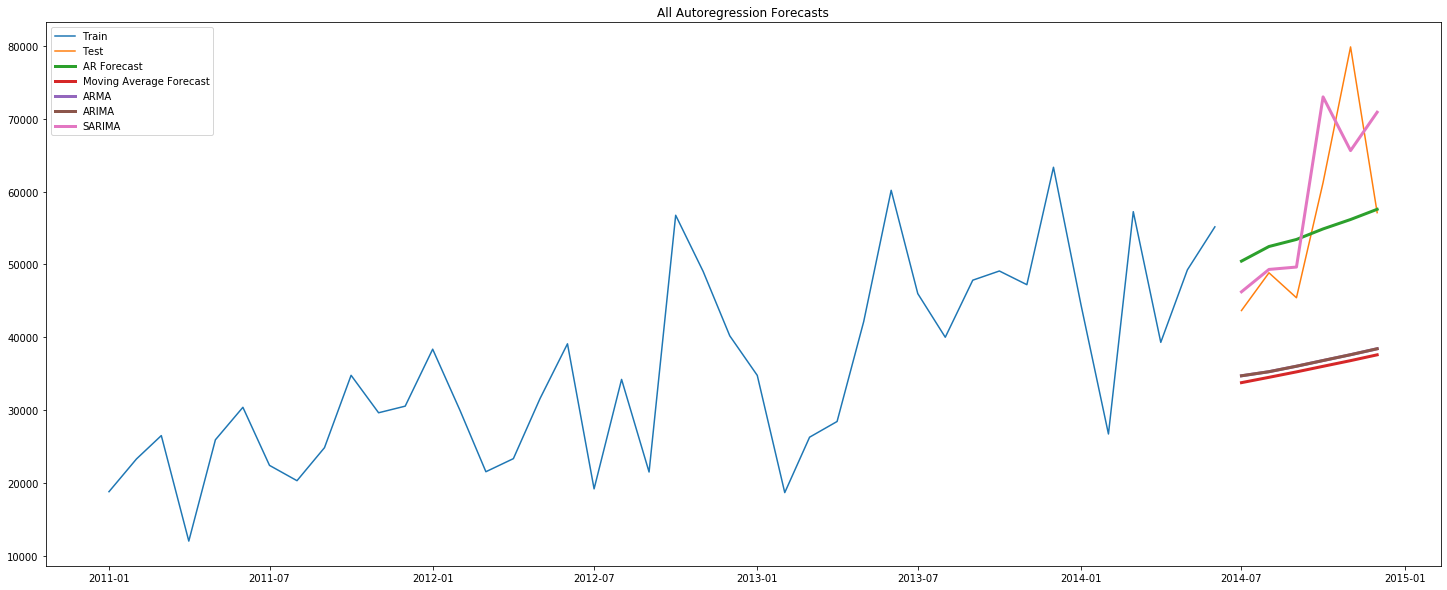

In [285]:
plt.figure(figsize=(25,10))
plt.plot(trainset['Sales'], label='Train')
plt.plot(testset['Sales'], label='Test')

plt.plot(y_hat_ar['ar_forecast'][testset.index.min():], label = 'AR Forecast', linewidth = 3)
plt.plot(y_hat_ma['ma_forecast'][testset.index.min():], label = 'Moving Average Forecast',linewidth = 3)
plt.plot(y_hat_arma['arma_forecast'][testset.index.min():], label = 'ARMA',linewidth = 3)
plt.plot(y_hat_arima['arima_forecast'][testset.index.min():], label = 'ARIMA',linewidth = 3)
plt.plot(y_hat_sarima['sarima_forecast'][testset.index.min():], label = 'SARIMA',linewidth = 3)
plt.legend(loc='best')
plt.title('All Autoregression Forecasts')
plt.show()

As we can conclude from the plot that SARIMA forecasts are the closest to the test set and its performance is better than other Autoregressive techniques. ARMA and ARIMA superimpose each other. 

**Conclusion:**
1. Sales data series had 48 observations. It displayed trend and seasonality. 
2. SARIMA performs the best in autoregression methods as it almost accurately predicts trend and seasonality. 
3. Holt Winters Additive method performs the best in smoothing techniques. 